**Project 2**

**Recommender System Using TFIDF**

In [3]:
#desired libraries
#this project is about getting the top 5 similar movies closed to this movie based on distance
#we can measure distance in two ways first cosine similarity which is recommended , second is euclidean distance
#so we apply nlp to strings related to each movie so we can numerize words and get the clothest based on score
#we will need at most two columns to have enough information
#converting these columns to BOW method and here we will use TFIDF , we can use count vectorizer
#second we apply similarity score using cosine similarity or euclidean disatnce
#this project is clustering not classification so there is no output and here we donot need any classical machine learning algorithm
#basic numerical computing libraries
import numpy as np
import pandas as pd
#import tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer
#import libararies of similarities
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [4]:
#import data
#better download it as csv from the lazy programmer website and import it locally
raw_data = pd.read_csv('tmdb_5000_movies.csv')
df = raw_data.copy()
df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1492,32000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,8055,"[{""id"": 74, ""name"": ""germany""}, {""id"": 1327, ""...",en,The Reader,"The story of Michael Berg, a German lawyer who...",33.923786,"[{""name"": ""Studio Babelsberg"", ""id"": 264}, {""n...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2008-12-10,113019290,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Behind the mystery lies a truth that will make...,The Reader,7.2,813
745,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,10040,"[{""id"": 1336, ""name"": ""ransom""}, {""id"": 2562, ...",en,Miss Congeniality 2: Armed and Fabulous,After her triumph at the Miss United States pa...,19.998581,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-03-11,0,115.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You might feel a little prick,Miss Congeniality 2: Armed and Fabulous,5.3,425
658,45000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.deathracemovie.net/,10483,"[{""id"": 830, ""name"": ""car race""}, {""id"": 4565,...",en,Death Race,"Terminal Island, New York: 2020. Overcrowding ...",42.578770,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-08-22,73762516,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Get ready for a killer race.,Death Race,6.0,1175
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,How to Fall in Love,5.2,20
3406,6900000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,9571,"[{""id"": 1228, ""name"": ""1970s""}, {""id"": 1556, ""...",en,Dazed and Confused,The adventures of a group of Texas teens on th...,26.181753,"[{""name"": ""Gramercy Pictures"", ""id"": 37}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1993-09-24,7993039,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,See it with a bud.,Dazed and Confused,7.4,583


**cleansing**

In [5]:
#investing
df.shape
#here we have 20 columns with 20 features and all we need is 2 columns to cluster based on title column

(4803, 20)

In [7]:
#check numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [10]:
#check categorical features
df.describe(include="O").T

,count,unique,top,freq
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370
homepage,1712,1691,http://www.missionimpossible.com/,4
keywords,4803,4222,[],412
original_language,4803,37,en,4505
original_title,4803,4801,Out of the Blue,2
overview,4800,4800,"In the 22nd century, a paraplegic Marine is di...",1
production_companies,4803,3697,[],351
production_countries,4803,469,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2977
release_date,4802,3280,2006-01-01,10
spoken_languages,4803,544,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",3171


In [12]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [13]:
#get general overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [14]:
#check duplicates
df.duplicated().sum()

0

In [16]:
#here i care about three columns ---> (title , genre , keywords)
df_f = df[['title','genres','keywords']]
df_f.head()

,title,genres,keywords
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


In [17]:
#check missing value
#there is no missing value
df_f.isna().sum()

title       0
genres      0
keywords    0
dtype: int64

In [19]:
#check columns
#rename columns
df_f.columns=df_f.columns.str.lower().str.strip().str.replace(" ","_")
df_f.columns

Index(['title', 'genres', 'keywords'], dtype='object')

In [20]:
#check object features
#no object features exist
for i in  df_f.select_dtypes('object'):
    print(f'for {i} : \n',df_f[i].value_counts())
    print('-'*60)

for title : 
 title
The Host                 2
Batman                   2
Out of the Blue          2
Avatar                   1
The Girl on the Train    1
                        ..
Step Up 3D               1
Secondhand Lions         1
The Age of Adaline       1
Drag Me to Hell          1
My Date with Drew        1
Name: count, Length: 4800, dtype: int64
------------------------------------------------------------
for genres : 
 genres
[{"id": 18, "name": "Drama"}]                                                                                                            370
[{"id": 35, "name": "Comedy"}]                                                                                                           282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                          164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                         

In [21]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   genres    4803 non-null   object
 2   keywords  4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


In [54]:
#here we donot have any stop words to remove and no need to stemming or lemmatization

**Text Preprocessing**

In [37]:
#we notice that the inputs are in json so i need to extarct the whole text in these two columns and make it in one single column called string which i will build my clustering on
import json
df_f['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [38]:
df_f['keywords']

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4798    [{"id": 5616, "name": "united states\u2013mexi...
4799                                                   []
4800    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4801                                                   []
4802    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4803, dtype: object

In [39]:
x=df_f.iloc[0]
x

title                                                  Avatar
genres      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
keywords    [{"id": 1463, "name": "culture clash"}, {"id":...
Name: 0, dtype: object

In [40]:
j=json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [42]:
stri=[]
for json in j :
   stri.append(json['name'])
' '.join(stri)

'Action Adventure Fantasy Science Fiction'

In [51]:
import json
#function to extact information and returns it in one single column
#we pass row each time in this function 
def create_string(row):
    #here we pass the final data frame and apply some preprocessing on it 
    #we do two phases one for genres and the other for keywords
    #we must load json
    #then gather all string in single variable
    
    #phase 1 'genres'
    j_1=json.loads(row['genres'])
    stri=[]
    for j in j_1 :
        stri.append(j['name'])
    genres=' '.join(stri)
    
    
    #phase 2 'keywords'
    j_2=json.loads(row['keywords'])
    stri=[]
    for j in j_2 :
        stri.append(j['name'])
    keywords=' '.join(stri)
    
    #return genres and keywords text together into single string
    return genres+" "+keywords

#add new column called string and apply this function to the whole data frame with axis = 1 beacuse we work on more than one column which means that it is data set so we have to sepicify wether it is column or row
df_f['string'] = df_f.apply(create_string,axis=1)    

C:\Users\hp\AppData\Local\Temp\ipykernel_2704\3782004854.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['string'] = df_f.apply(create_string,axis=1)


In [52]:
#general overview
df_f

,title,genres,keywords,string
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Action Crime Drama Thriller dc comics crime fi...
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",Action Adventure Science Fiction based on nove...
...,...,...,...,...
4798,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",Action Crime Thriller united states–mexico bar...
4799,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],Comedy Romance
4800,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",Comedy Drama Romance TV Movie date love at fir...
4801,Shanghai Calling,[],[],


**Bag of Words**

**TFIDF**

In [56]:
#create tfidf instance
tfidf = TfidfVectorizer()
#apply the model on string column to get similarity later based on this x when passing query
x = tfidf.fit_transform(df_f['string'])

In [57]:
x

<4803x7164 sparse matrix of type '<class 'numpy.float64'>'
	with 63598 stored elements in Compressed Sparse Row format>

**Testing on query**

In [70]:
#let's say we have Scream 3 movie and i want to get similar movies based on string column so i have to search in x database
#first get the index of movie from df_f
#apply filter
movie = df_f[df_f['title'] == 'Scream 3']
movie

,title,genres,keywords,string
1164,Scream 3,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 2546, ""name"": ""mask""}, {""id"": 2573, ""n...",Horror Mystery mask metal detector film direct...


In [71]:
#second get the index with 0 to get the number directly without needing to make new data frame mapping each movie to index number
idx = movie.index[0]
idx

1164

In [72]:
#third pass this index to x to access it 
#make sure that index is the number of row in x which is related to the spicific movie in our sparse matrix
query = x[idx]
query

<1x7164 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [73]:
#fourth convert it to vector so we can compare it with other vectors to get similarity
arr = query.toarray()
arr

array([[0., 0., 0., ..., 0., 0., 0.]])

In [79]:
#fifth compute similarity between this vector and others so we can get similar movies 
#we will use cosine similarity
scores = cosine_similarity(arr ,x)
scores

array([[0.        , 0.01548139, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [80]:
#0 means dissimilar and 1 means similar
#sixth we flatten our scores so we can have it as pd instead if 1 x N matrix
scores = scores.flatten()
scores

array([0.        , 0.01548139, 0.        , ..., 0.        , 0.        ,
       0.        ])

**EDA**

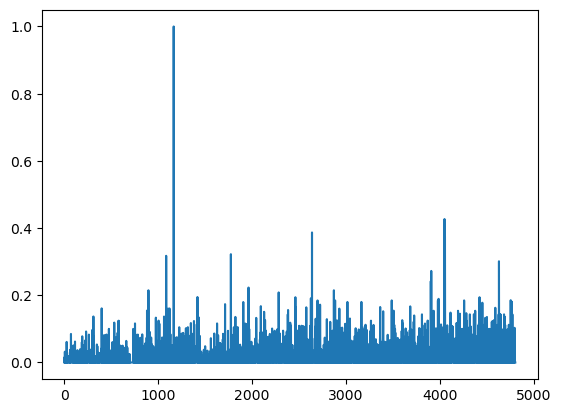

In [77]:
#we choose plot library because i will visualize scores only and they are pd of numbers not related to any data frame
import matplotlib.pyplot as plt
plt.plot(scores)

In [81]:
#seventh sort the scores from dissimilar to similar
scores.argsort()

array([   0, 2661, 2662, ..., 2637, 4048, 1164], dtype=int64)

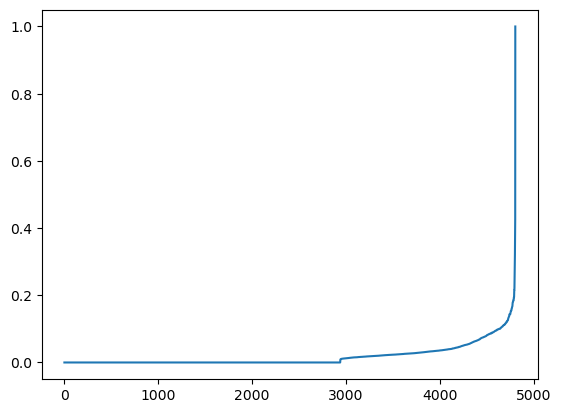

In [84]:
#display the scores from smallest to largest so we apply .argsort() function to make sure about replacement
plt.plot(scores[scores.argsort()])

In [85]:
#so we want the versa order and versa disaplay from largest to smallest
#so we say - scores
(-scores).argsort()

array([1164, 4048, 2637, ..., 1887, 1873, 4802], dtype=int64)

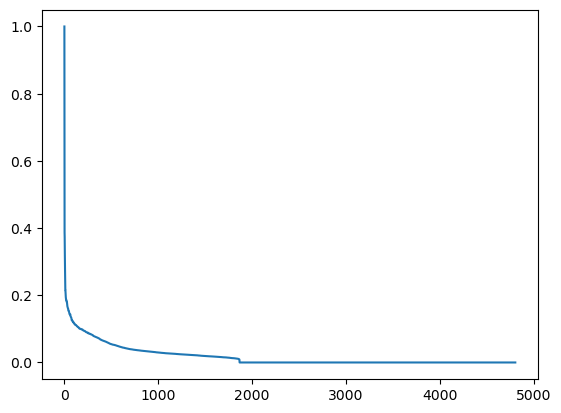

In [86]:
#display the scores from largest to smallest so we apply .argsort() function to make sure about replacement
plt.plot(scores[(-scores).argsort()])

In [88]:
#eighth get recommended movies
#first get index 
#we start from 1 as we donot want the zero index which is related to 1 and it is the movie it self
#top 5
#i canot apply .head() because it will be the movie itself
idx_list=(-scores).argsort()[1:6]
idx_list

array([4048, 2637, 4053, 1773, 1084], dtype=int64)

In [95]:
#second apss it to data fram title column
#then convert it to list so we can store the name of the movies in list
df_f['title'].iloc[idx_list].to_list()


['The Calling',
 "Felicia's Journey",
 'Friday the 13th: A New Beginning',
 'Mindhunters',
 'The Glimmer Man']

**Validation**

In [100]:
title = input('Enter Movie exist in our data base : ')
def get_recommend (title):
    try :
        #first get the index of movie from df_f
        #apply filter
        #to capatalize every word in string in case the user forget
        title = ' '.join(word.capitalize() for word in title.split())
        movie = df_f[df_f['title'] == title]
        #second get the index with 0 to get the number directly without needing to make new data frame mapping each movie to index number
        idx = movie.index[0]
        #third pass this index to x to access it 
        #make sure that index is the number of row in x which is related to the spicific movie in our sparse matrix
        query = x[idx]
        #fourth convert it to vector so we can compare it with other vectors to get similarity
        arr = query.toarray()
        #fifth compute similarity between this vector and others so we can get similar movies 
        #we will use cosine similarity
        scores = cosine_similarity(arr ,x)  
        #0 means dissimilar and 1 means similar
        #sixth we flatten our scores so we can have it as pd instead if 1 x N matrix
        scores = scores.flatten()
        #seventh get recommended movies
        #first get index 
        #we start from 1 as we donot want the zero index which is related to 1 and it is the movie it self
        #top 5
        #i canot apply .head() because it will be the movie itself
        idx_list=(-scores).argsort()[1:6]
        #second apss it to data fram title column
        #then convert it to list so we can store the name of the movies in list
        return df_f['title'].iloc[idx_list].to_list()
    except :
        return 'Sorry! movie not found in data base'
print(f'Recommended movies for {title} : ',get_recommend(title))

Recommended movies for asdasd :  Sorry! movie not found in data base
